O conjunto de dados que temos são de 90.189 jogadores que instalaram o jogo enquanto o teste A/B estava em execução. Neste projeto será feito, uma análise exploratória, e será feito testes estatísticos para avaliar o impacto da mudança das versões dos jogos na retenção de jogadores.

Link dataset: https://www.kaggle.com/datasets/mursideyarkin/mobile-games-ab-testing-cookie-cats/data

In [1]:
import pandas as pd

# Carregar os dados
df = pd.read_csv("/content/drive/MyDrive/Dataset Jogos Cookie Cat/cookie_cats.csv")

# Visualizar as primeiras linhas da tabela
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


O conjunto de dados possui as seguintes colunas:

userid: Identificador único do usuário.

version: Versão do jogo (aparentemente duas versões diferentes, gate_30 e gate_40).

sum_gamerounds: Total de rodadas jogadas pelo usuário.

retention_1: Se o usuário retornou após 1 dia.

retention_7: Se o usuário retornou após 7 dias.

In [ ]:
# Verificar valores ausentes
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

O conjunto de dados não tem valores ausentes.

In [2]:
# Obtendo estatísticas descritivas
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


A descrição da estatística descritiva

userid: Varia de 116 a quase 10 milhões, indicando muitos usuários únicos.

sum_gamerounds: A média de rodadas jogadas é aproximadamente 52, mas o desvio padrão é grande (195), indicando uma ampla variação na quantidade de rodadas jogadas pelos usuários. O valor máximo é 49854, o que sugere a presença de outlier

Criar gráfico para visualizar a distribuição do total de rodadas.

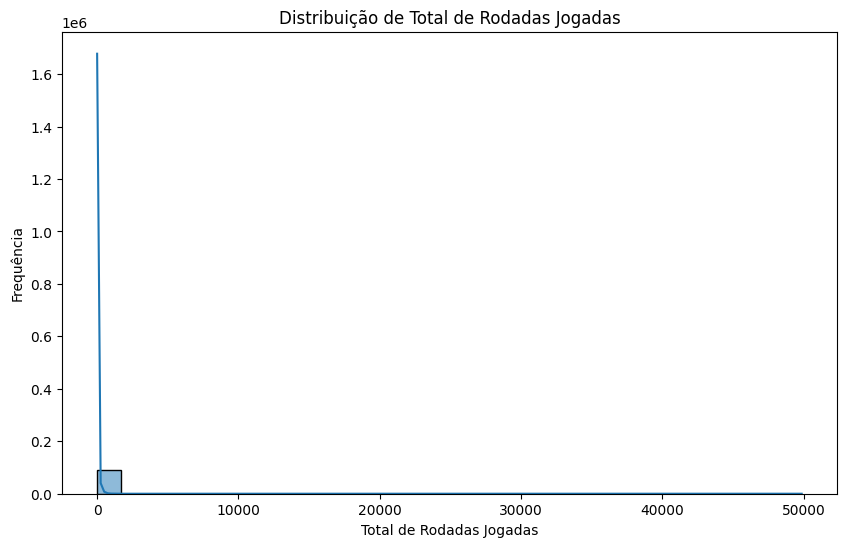

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para sum_gamerounds
plt.figure(figsize=(10, 6))
sns.histplot(df['sum_gamerounds'], bins=30, kde=True)
plt.title('Distribuição de Total de Rodadas Jogadas')
plt.xlabel('Total de Rodadas Jogadas')
plt.ylabel('Frequência')
plt.show()

Histograma de sum_gamerounds: A maioria dos jogadores jogou um número relativamente pequeno de rodadas, com a frequência caindo rapidamente conforme o número de rodadas aumenta. Isso é típico de jogos casuais, onde muitos jogadores experimentam o jogo mas apenas uma pequena fração se mantém ativa por longos períodos.

Criar gráfico para visualizar a distribuição das versões do jogo.

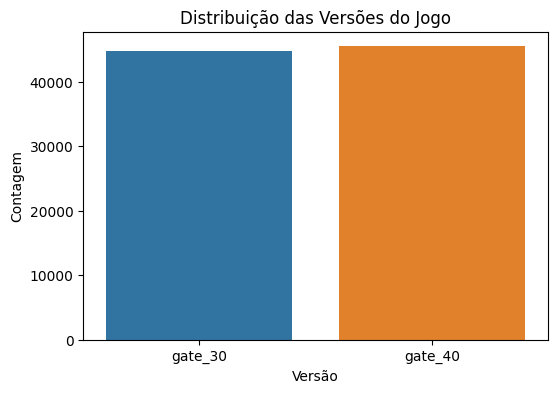

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contagem das categorias em 'version'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='version')
plt.title('Distribuição das Versões do Jogo')
plt.xlabel('Versão')
plt.ylabel('Contagem')
plt.show()

Distribuição das Versões do Jogo (version): As duas versões do jogo (gate_30 e gate_40) estão aproximadamente igualmente representadas.

Criar gráfico para visualizar a distribuição das retenções.

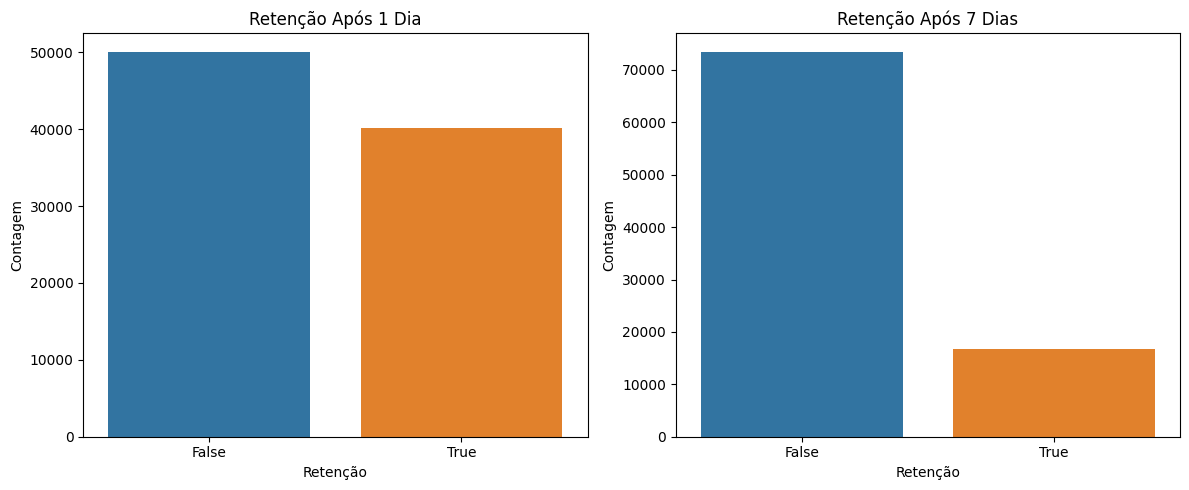

In [14]:
# Contagem das categorias em 'retention_1' e 'retention_7'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(ax=axes[0], data=df, x='retention_1')
axes[0].set_title('Retenção Após 1 Dia')
axes[0].set_xlabel('Retenção')
axes[0].set_ylabel('Contagem')

sns.countplot(ax=axes[1], data=df, x='retention_7')
axes[1].set_title('Retenção Após 7 Dias')
axes[1].set_xlabel('Retenção')
axes[1].set_ylabel('Contagem')
plt.tight_layout()
plt.show()

Retenção Após 1 Dia (retention_1): Mais usuários não retornaram após 1 dia do que o contrário.

Retenção Após 7 Dias (retention_7): A retenção após 7 dias é significativamente menor do que após 1 dia, o que é esperado, mas ainda fornece um indicativo importante sobre o engajamento a longo prazo dos usuários.

Vamos criar a matriz de correlação e o mapa de calor.

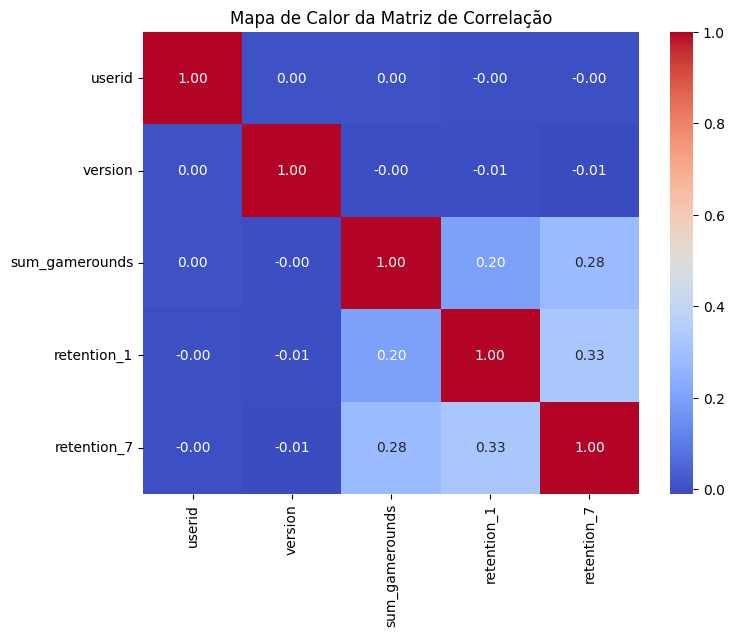

,userid,version,sum_gamerounds,retention_1,retention_7
userid,1.000000,0.003730,0.001847,-0.002596,-0.002636
version,0.003730,1.000000,-0.002967,-0.005941,-0.010537
sum_gamerounds,0.001847,-0.002967,1.000000,0.197603,0.279288
retention_1,-0.002596,-0.005941,0.197603,1.000000,0.327401
retention_7,-0.002636,-0.010537,0.279288,0.327401,1.000000


In [19]:
# Converter variáveis categóricas em numéricas
data_numerical = df.copy()
data_numerical['version'] = data_numerical['version'].map({'gate_30': 0, 'gate_40': 1})
data_numerical['retention_1'] = data_numerical['retention_1'].astype(int)
data_numerical['retention_7'] = data_numerical['retention_7'].astype(int)

# Calculando a matriz de correlação
correlation_matrix = data_numerical.corr()

# Visualizando a matriz de correlação com um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

correlation_matrix

Observações

sum_gamerounds e Retenção (retention_1 e retention_7): Existe uma correlação positiva moderada entre o número total de rodadas jogadas e a retenção tanto após 1 dia quanto após 7 dias. Isto indica que quanto mais um usuário joga, maior a probabilidade de eles retornarem ao jogo. A correlação é mais forte para a retenção após 7 dias.

Retenção 1 Dia e Retenção 7 Dias: Há uma correlação forte entre a retenção após 1 dia e após 7 dias. Usuários que retornam após um dia têm uma maior probabilidade de continuar jogando após uma semana.

Versão do Jogo (version) e Outras Variáveis: A versão do jogo tem uma correlação muito baixa com o número total de rodadas jogadas e com a retenção, sugerindo que a mudança da versão do jogo (gate_30 para gate_40) teve um impacto mínimo nesses aspectos.

Será feito o teste A/B, que a metodologia será explicada abaixo.

Objetivo do Teste: Avaliar se há uma diferença significativa na retenção de jogadores entre as duas versões do jogo (gate_30 e gate_40).

Definição de Hipóteses: Hipótese Nula (H0): Não há diferença na retenção de jogadores entre as versões do jogo. Hipótese Alternativa (H1): Há uma diferença na retenção de jogadores entre as versões do jogo.

Verificação de Suposições: Verificar se os tamanhos dos grupos são comparáveis.
E a valiar se a métrica de retenção (por exemplo, retenção após 1 dia) tem uma distribuição normal nos dois grupos.

Teste de Hipótese: Realizar um teste estatístico (por exemplo, o teste t de Student) para comparar as métricas de retenção entre as duas versões do jogo.

gate_40    45489
gate_30    44700
Name: version, dtype: int64


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


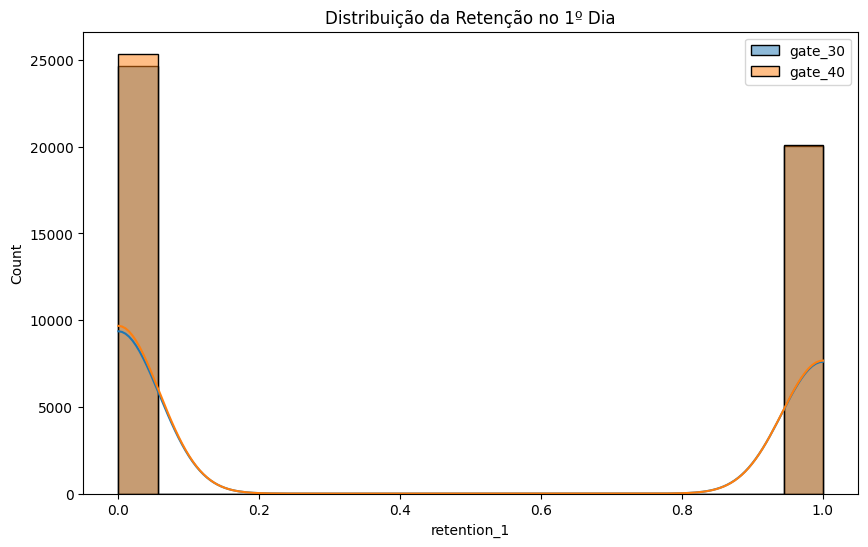

P-valor para o teste de normalidade no gate_30: 6.35628983417737e-42
P-valor para o teste de normalidade no gate_40: 1.1211789013062861e-41
P-valor para o teste t: 0.07441111525563184
Não rejeitamos a hipótese nula (H0). A mudança não tem efeito significativo na retenção de jogadores.
Recomenda-se não implementar a mudança, pois ela não apresentou impacto significativo na retenção de jogadores.


In [22]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados
df = pd.read_csv('/content/drive/MyDrive/Dataset Jogos Cookie Cat/cookie_cats.csv')

# 1. Definir a Hipótese
# Hipótese Nula (H0): A mudança não tem efeito na retenção de jogadores.
# Hipótese Alternativa (H1): A mudança tem efeito na retenção de jogadores.

# 2. Verificar Suposições

# Verificar se os grupos (gate_30 e gate_40) são de tamanhos comparáveis
version_counts = df['version'].value_counts()
print(version_counts)

# Verificar se a distribuição das métricas nos grupos é normal
# Vamos verificar a retenção no 1º dia
plt.figure(figsize=(10, 6))
sns.histplot(df[df['version'] == 'gate_30']['retention_1'], label='gate_30', kde=True)
sns.histplot(df[df['version'] == 'gate_40']['retention_1'], label='gate_40', kde=True)
plt.legend()
plt.title('Distribuição da Retenção no 1º Dia')
plt.show()

# Teste de normalidade (teste Shapiro-Wilk)
stat_gate_30, p_gate_30 = stats.shapiro(df[df['version'] == 'gate_30']['retention_1'].sample(1000))  # limitando a 1000 amostras devido a limitações do teste
stat_gate_40, p_gate_40 = stats.shapiro(df[df['version'] == 'gate_40']['retention_1'].sample(1000))

print(f"P-valor para o teste de normalidade no gate_30: {p_gate_30}")
print(f"P-valor para o teste de normalidade no gate_40: {p_gate_40}")

# 3. Realizar o Teste de Hipótese

# Utilizar o teste t de Student
t_stat, p_val = stats.ttest_ind(df[df['version'] == 'gate_30']['retention_1'],
                                df[df['version'] == 'gate_40']['retention_1'])

print(f"P-valor para o teste t: {p_val}")

# 4. Inferência
alpha = 0.05
if p_val < alpha:
    print("Rejeitamos a hipótese nula (H0). A mudança tem efeito na retenção de jogadores.")
else:
    print("Não rejeitamos a hipótese nula (H0). A mudança não tem efeito significativo na retenção de jogadores.")

# 5. Recomendação

if p_val < alpha:
    print("Recomenda-se implementar a mudança, pois ela tem um impacto positivo na retenção de jogadores.")
else:
    print("Recomenda-se não implementar a mudança, pois ela não apresentou impacto significativo na retenção de jogadores.")

Resultados do Teste A/B

Distribuição da Métrica de Retenção: A análise das distribuições de retenção para cada grupo (versões gate_30 e gate_40) é realizada, possivelmente incluindo a visualização dessas distribuições.

Normalidade das Distribuições: Um teste de normalidade (como o teste Shapiro-Wilk) é aplicado para verificar a normalidade das distribuições de retenção nos grupos. Se o p-valor é menor que um limiar (geralmente 0,05), a hipótese de normalidade é rejeitada, indicando que a distribuição dos dados não é normal. Se o p-valor é maior, não rejeitamos a hipótese de normalidade. O resultado do P-valor para o teste de normalidade no gate_30: 6.35628983417737e-42. O resultado do P-valor para o teste de normalidade no gate_40: 1.1211789013062861e-41.

Teste t de Student: Um teste t de Student é realizado para comparar as médias de retenção entre gate_30 e gate_40. O resultado deste teste é expresso através de um P-valor para o teste t: 0.07441111525563184

Inferência Estatística: Se o P-valor para o teste t for menor que um limiar estabelecido (geralmente 0,05), a hipótese nula é rejeitada, indicando uma diferença estatisticamente significativa na retenção entre as versões do jogo. Caso contrário, não há evidências suficientes para rejeitar a hipótese nula, sugerindo que as mudanças entre as versões não têm impacto significativo na retenção.

Resultado Final: Não rejeitamos a hipótese nula (H0). A mudança não tem efeito significativo na retenção de jogadores. Recomenda-se não implementar a mudança, pois ela não apresentou impacto significativo na retenção de jogadores.

Conclusão

A conclusão do teste A/B depende do valor-p obtido e do limiar de significância estabelecido. Se o teste encontrou uma diferença significativa, isso indica que uma das versões do jogo é superior em termos de retenção de jogadores. Se não houver diferença significativa, isso sugere que as alterações entre as versões do jogo não influenciam a retenção dos jogadores de maneira perceptível.

A recomendação final, se basear na implementação de mudanças no jogo, deve considerar os resultados do teste A/B juntamente com outras métricas e considerações de negócios. Por exemplo, se uma versão do jogo melhorar a retenção, mas for mais cara ou mais difícil de manter, esses fatores também devem ser levados em conta.